1

In [12]:
import pandas as pd

data = pd.read_csv('dane1.csv')

# Zamień skróty nazw dni tygodnia na polskie odpowiedniki (pełne nazwy dni tygodnia) - kolumna created_at
data['created_at'] = data['created_at'].str.replace('Mon', 'Poniedziałek').str.replace('Tue', 'Wtorek').str.replace('Wed', 'Środa').str.replace('Thu', 'Czwartek').str.replace('Fri', 'Piątek').str.replace('Sat', 'Sobota').str.replace('Sun', 'Niedziela')

# Zamień skróty nazw miesięcy na liczbowe odpowiedniki (np Jun na 06) - kolumna user_created_at
data['user_created_at'] = data['user_created_at'].str.replace('Jan', '01').str.replace('Feb', '02').str.replace('Mar', '03').str.replace('Apr', '04').str.replace('May', '05').str.replace('Jun', '06').str.replace('Jul', '07').str.replace('Aug', '08').str.replace('Sep', '09').str.replace('Oct', '10').str.replace('Nov', '11').str.replace('Dec', '12')

# Pobierz wszystkie linki do tweetów i przekaż je do listy.
tweet_links = data['urls'].tolist()

# Pobierz wszystkie linki do obrazków i przekaż je do listy (kolumna media).
image_links = data['media'].tolist()

# Usuń wszystkie słowa oznaczone jako stopwords i przekaż oczyszczony tekst do nowej kolumny o nazwie text_without_stopwords
stopwords = ['a', 'i', 'w', 'na', 'z', 'do', 'o', 'że', 'się', 'jest', 'by', 'co', 'jak', 'tego', 'czy', 'tylko']
data['text_without_stopwords'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stopwords]))

# Wyniki
print("Linki do tweetów:")
print(tweet_links)
print("\nLinki do obrazków:")
print(image_links)
print("\nTekst bez stopwords:")
print(data['text_without_stopwords'])


Linki do tweetów:
[nan, nan, 'https://ift.tt/3yTNxU8', nan, 'http://m.in', nan, nan, nan, 'https://bit.ly/3vFbjBr', nan, nan, nan, 'https://warszawa.wyborcza.pl/warszawa/7,54420,27148510,92-letni-powstaniec-zbieral-na-operacje-oczu-zostal-okradziony.html', 'https://ift.tt/2eGZx0Z', nan, nan, 'https://www.facebook.com/skkpolonia/videos/378163756953482', nan, nan, 'https://ift.tt/3uD9dki', 'http://drogi.gddkia.gov.pl', nan, nan, nan, 'http://dlvr.it/S0q2fc', nan, nan, 'https://warszawa.wyborcza.pl/warszawa/7,54420,27157444,warszawskie-puby-przygotowuja-sie-na-euro-2020-na-przeszkodzie.html', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'https://tvn24.pl/tvnwarszawa/srodmiescie/warszawa-policja-pozyczali-markowe-odkurzacze-i-sprzedawali-w-internecie-za-pol-ceny-5109381', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'https://warszawa.wyborcza.pl/warszawa/7,54420,27097011,ty-cwana-suko-twoja-sielanka-w-koncu-sie-skonczy-od-pon

2

In [14]:
# Wybierz top 5 tweetów z największą liczbą polubień
top_liked_tweets = data.nlargest(5, 'favorite_count')
print(top_liked_tweets[['text', 'favorite_count']])



                                                   text  favorite_count
4599  Dziś z prezydent-elekt @Tsihanouskaya mówiliśm...            1386
4012  Warszawa czeka na @Tsihanouskaya. #StandWithBe...             744
290   Jasio, który nie panuje nad swoją jadaczką, zn...             623
1466  Czyli prezydenci opozycji: \n👉Poznań -cieszy s...             605
1841  Pierwszy z 21 nowych pociągów @SKM_Warszawa ju...             553


In [15]:
# Wybierz top 5 tweetów z największą liczbą retweetów
top_retweeted_tweets = data.nlargest(5, 'retweet_count')
print(top_retweeted_tweets[['text', 'retweet_count']])


                                                   text  retweet_count
622   HALO WARSZAWA\nchętnie rozjaśnię, ufarbuję, ze...           1638
4383  ‼️\nA teraz perełka. Finał Was rozwali. \n10-1...            896
182   UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...            865
217   UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...            865
278   UWAGA #Warszawa Śniadeckich 12/16\n\nPani Danu...            865


In [16]:
# Wybierz tweety, które nie są oznaczone jako "wrażliwe"
non_sensitive_tweets = data[data['possibly_sensitive'] == False]
print(non_sensitive_tweets[['text', 'possibly_sensitive']])

                                                   text possibly_sensitive
0     @beata_skwarska Warszawa 😀 https://t.co/W7BcyS...              False
2     ⚠️ Utrudnienia w komunikacji: L20 https://t.co...              False
4     Dzieci to największy skarb, o który musimy dba...              False
6     1 czerwca 1895 urodził się Tadeusz Komorowski ...              False
8     Pomimo malejącej liczby urodzeń w Warszawie, l...              False
...                                                 ...                ...
5089  Oj, biletowanego szpila dawno nie było. Ursus ...              False
5091  Warszawa czeka na @Tsihanouskaya. #StandWithBe...              False
5097  is it Jeju? no! it's Warsaw 🌴 #좋은날씨 #금요일 #바르샤바...              False
5098  Uroczystości odbyły się w 29. rocznicę upadku ...              False
5102  https://t.co/3TSBVAk63h\nPuby i restauracje ju...              False

[1702 rows x 2 columns]


In [19]:
data['user_created_at'] = pd.to_datetime(data['user_created_at'])

# Wybierz użytkownika, który założył konto najwcześniej
earliest_user = data.nsmallest(1, 'user_created_at')
earliest_user_tweets = data[data['user_id'] == earliest_user['user_id'].values[0]]
print(earliest_user_tweets[['text', 'user_created_at']])

                                                   text  \
1384  Policjanci z wydziału do walki z przestępczośc...   

               user_created_at  
1384 2006-11-26 19:35:19+00:00  


In [21]:
# Wybierz tweety użytkownika z największą liczbą followersów
user_with_most_followers = data.nlargest(1, 'user_followers_count')
user_with_most_followers_tweets = data[data['user_id'] == user_with_most_followers['user_id'].values[0]]
print(user_with_most_followers_tweets[['text', 'user_followers_count']])



                                                   text  user_followers_count
92    W poniedziałek późnym wieczorem na Mokotowie z...               1911494
424   Aktywista miejski Jan Śpiewak przegrał proces ...               1911494
1008  Sprawcy szuka policja.\n\nhttps://t.co/J5YwjOPMTy               1911494
2402  "Tylko w ostatnich czterech dniach zaszczepili...               1911494
2525  W środę po południu w okolicach mostu Świętokr...               1911494
3289  Zarząd Transportu Miejskiego zapowiada, że czę...               1911494
3572  "Jego spokój pozytywnie udziela się pozostałym...               1911494


In [22]:
# Wybierz tweety zweryfikowanych użytkowników
verified_users_tweets = data[data['user_verified'] == True]
print(verified_users_tweets[['text', 'user_verified']])


                                                   text  user_verified
4     Dzieci to największy skarb, o który musimy dba...           True
23    @GPietruczuk @RazemDlaBielan @DominikkKuc @Bie...           True
27    https://t.co/3TSBVAk63h\nPuby i restauracje ju...           True
36    W Dowództwie Garnizonu Warszawa #DzieńDziecka ...           True
49    Śródmiejscy wywiadowcy zatrzymali dwóch podejr...           True
...                                                 ...            ...
4963  Kolejnym etapem produkcji będzie wyposażenie w...           True
4981  #4czerwca, w rocznicę pierwszych częściowo wol...           True
5021  Park został otwarty dla mieszkańców w 1955 rok...           True
5036  #4czerwca, w rocznicę pierwszych częściowo wol...           True
5098  Uroczystości odbyły się w 29. rocznicę upadku ...           True

[191 rows x 2 columns]


In [35]:
# Pobierz dzień tygodnia z kolumny created_at
data['day_of_week'] = data['created_at'].apply(lambda x: x.split()[0])

# Zlicz liczbę tweetów dla każdego dnia tygodnia
tweets_per_day = data['day_of_week'].value_counts()

# Znajdź dzień z największą liczbą tweetów
most_common_day = tweets_per_day.idxmax()
number_of_tweets = tweets_per_day.max()

print(f"Najczęściej tweety były publikowane w dniu: {most_common_day}, liczba tweetów: {number_of_tweets}")

Najczęściej tweety były publikowane w dniu: Środa, liczba tweetów: 1657


3

In [41]:
!pip install spacy
!python -m spacy download pl_core_news_sm
import spacy
nlp = spacy.load("pl_core_news_sm")




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 37.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pl_core_news_sm')


In [42]:
# Funkcja do rozpoznawania osób (persName)
def detect_pers_names(text):
    doc = nlp(text)
    pers_names = []
    for ent in doc.ents:
        if ent.label_ == "persName":
            pers_names.append(ent.text)
    return pers_names

# Funkcja do rozpoznawania miejsc (placeName)
def detect_place_names(text):
    doc = nlp(text)
    place_names = []
    for ent in doc.ents:
        if ent.label_ == "placeName":
            place_names.append(ent.text)
    return place_names

# Funkcja do rozpoznawania organizacji (orgName)
def detect_org_names(text):
    doc = nlp(text)
    org_names = []
    for ent in doc.ents:
        if ent.label_ == "orgName":
            org_names.append(ent.text)
    return org_names

# Wykonaj analizę dla każdego wiersza w kolumnie "text"
data['persons'] = data['text'].apply(detect_pers_names)
data['places'] = data['text'].apply(detect_place_names)
data['organizations'] = data['text'].apply(detect_org_names)

# Wyniki
print("Osoby:")
print(data[data['persons'].apply(len) > 0]['persons'])
print("\nMiejsca:")
print(data[data['places'].apply(len) > 0]['places'])
print("\nOrganizacje:")
print(data[data['organizations'].apply(len) > 0]['organizations'])

Osoby:
5                  [Wojciecha Korkucia]
6                  [Tadeusz Komorowski]
10                        [Trzaskowski]
27      [https://t.co/3TSBVAk63h\nPuby]
34                             [Banota]
                     ...               
5095      [Zygalski, Rejewski, Różycki]
5097                             [Jeju]
5099           [Warszawa - Śródmieście]
5100                             [Kasi]
5102    [https://t.co/3TSBVAk63h\nPuby]
Name: persons, Length: 2338, dtype: object

Miejsca:
0           [@beata_skwarska, Warszawa]
1              [warszawskim, Grochowie]
3       [Warszawa, polskiego, Warschau]
4                            [Warszawa]
5                            [Warszawa]
                     ...               
5095                           [Polscy]
5096                         [warszawa]
5097                 [Warszawa, Poland]
5100                         [Warszawa]
5101                         [Warszawa]
Name: places, Length: 3119, dtype: object

Organizacje:
2   

4

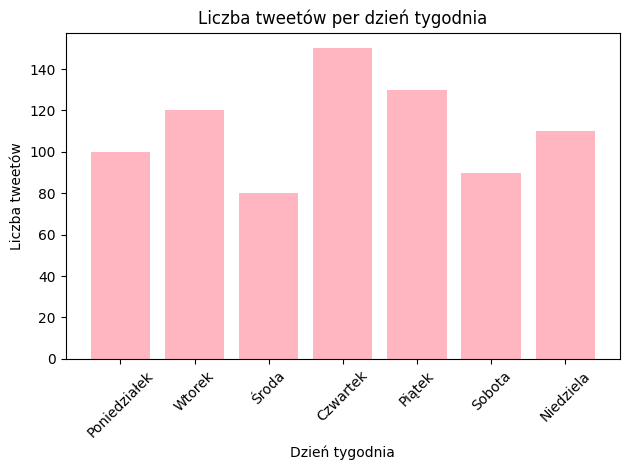

In [49]:
import matplotlib.pyplot as plt
dni_tygodnia = list(wystapienia_slownik.keys())
liczba_tweetow = list(wystapienia_slownik.values())

# Tworzenie wykresu słupkowego
plt.bar(dni_tygodnia, liczba_tweetow, color='lightpink')
plt.title('Liczba tweetów per dzień tygodnia')
plt.xlabel('Dzień tygodnia')
plt.ylabel('Liczba tweetów')
plt.xticks(rotation=45)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()